Project Name: **Shelter**

Aim: To **predict house prices** in King County which is dependent on more than 20 variables.

Dataset:

> This is dataset is acquired from Kaggle, link to the dataset:
https://www.kaggle.com/harlfoxem/housesalesprediction

> This dataset contains **21613 observation** and **21 variables**, including the **target variable which is ‘price’**. Details about every variable is given below as we preprocess the data.

> This dataset contains details about the houses’ characteristics like area of lot, number of bedrooms, number of bedrooms and many more.

Plan of the project:

> Firstly, the dataset is cleaned by **deleting outliers**, transforming the data using various **transformation techniques** so that the data should be distributed normally.

> As the number of variables are low after the preprocessing of the data, no dimension reduction techniques were applied.

> After comparing 4 regression technique, **linear regression** method was applied.

> At last, a **form** was created so that we can input the data normally and get the price of the house.


In [ ]:
#importing libraries

import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl
import seaborn as sns
import scipy.stats as stats
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
#importing csv file
#you can download this file from the Link: https://www.kaggle.com/harlfoxem/housesalesprediction

data = pd.read_csv("kc_house_data.csv")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
#printing column names

data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

**ID** column

> Deleting ID column because its unique and no need for further analysis



In [ ]:
data = data.drop(columns = ['id'])

**Date** Column



> This column tells us when did the sale happen, at what date and the time. As from the above dataset, we can see that the time is 12 am for everything, but this column tell us the **date** and we are interested in date only for now.

Transformation:

> Preprocessing the date column is such a way that we only get **year** and not the month and date values

> I am doing this because there is another column in dataset telling about the year in which the house was renovated. We can calculate the difference between the two columns and get to know how old is the house.




In [ ]:
data['date'] = data['date'].str[:8]
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')
data['date'] = data['date'].dt.year
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,2015,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2014,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,2015,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


**Price** Column
> This column tells us the **sale price** of the house. This is the **target variable** as we are trying to predict this value depending upon different variables.


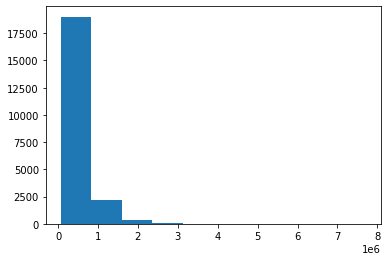

In [ ]:
#plotting histogram to see the distribution of the data

plt.hist(data.price)
plt.show()

In [ ]:
#Printing the skewness value of the data.

data.price.skew(axis = 0, skipna = True)

4.024069144684712

As the data is **positively skewed**, we have to perform some **tranformation** to make this data distributed normally for further analysis. As you can see after applying the **log tranformation**, the **skewness reduces**. Also you can see from the graph below the data is **distributed normally**.

> If skewness is less than -1 or greater than 1, the distribution is highly skewed.

> If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.

> If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.






 

In [ ]:
#Here is value is less, after applying log tranformation, so we can say that the data is distributed symmetrically.

np.log(data.price).skew(axis = 0, skipna = True)

0.42807247557592526

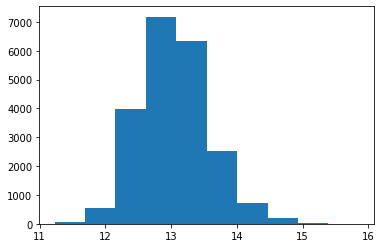

In [ ]:
#plotting histogram to see the distribution of the data

plt.hist(np.log(data.price))
plt.show()

data.price = np.log(data.price)

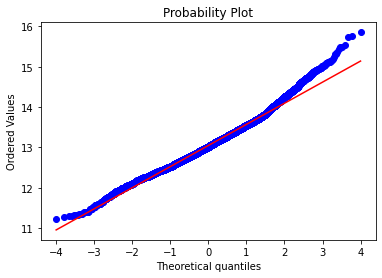

In [ ]:
#Plotting Q-Q plot to see its distribution

stats.probplot(data['price'], dist="norm", plot=plt)
plt.show()

Above figure says that the data is **normally distributed**

**Bedrooms** Column

> This dataset tells us about the number of bedrooms 



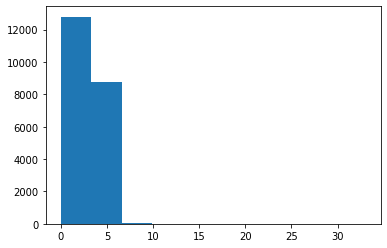

In [ ]:
#plotting histogram to see the distribution of the data

plt.hist(data.bedrooms)
plt.show()

In [ ]:
sum(data.bedrooms.isna())

0

In [ ]:
data.bedrooms.skew(axis = 0, skipna = True)

1.97429953543601

In [ ]:
#performing square root tranformation of this attribute to make its data distributed normally.

np.sqrt(data.bedrooms).skew(axis = 0, skipna = True)

-0.0962620123618273

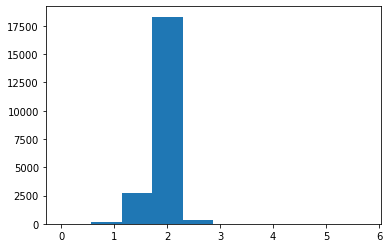

In [ ]:
plt.hist(np.sqrt(data.bedrooms))
plt.show()

data.bedrooms = np.sqrt(data.bedrooms)

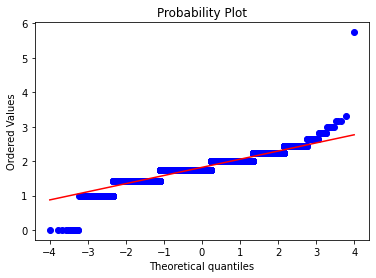

In [ ]:
stats.probplot(data['bedrooms'], dist="norm", plot=plt)
plt.show()

> After checking the **skewness** of the data and performing **log tranformation** method on the data, the above qq plot data shows that the data is **not normally distributed**.

> I think this is happening because there are many **outliers** in this variables which needs to be remove to make data normally distributed.

> That's why I am using **box-plot graph** to check if there are outliers and to check which outliers should be deleted. After come consideration I **deleted the bedrooms values whos values are above 4 and below zero**.







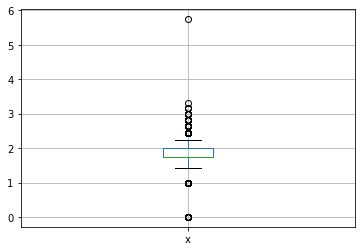

In [ ]:
pd.DataFrame.boxplot(data.bedrooms)

Deleting some extreme outliers to distribute data normally

In [ ]:
data = data[data['bedrooms'] < 4]
data = data[data['bedrooms'] >= 1]

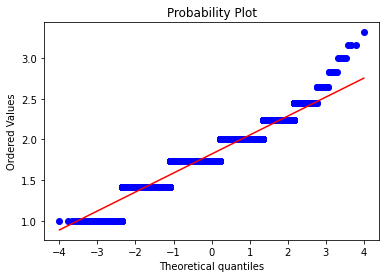

In [ ]:
stats.probplot(data['bedrooms'], dist="norm", plot=plt)
plt.show()

In [ ]:
data.bedrooms.skew(axis = 0, skipna = True)

-0.06005012945663907

From the above graph we can see that the data is distributed more normally now.

**bathrooms** column

> This column tell us about the number of bathrooms are there in a house.



In [ ]:
sum(data.bathrooms.isna())

0

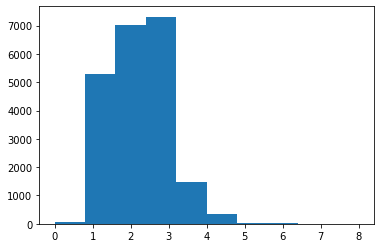

In [ ]:
plt.hist(data.bathrooms)
plt.show()

In [ ]:
data.bathrooms.skew(axis = 0, skipna = True)

0.5171183120268869

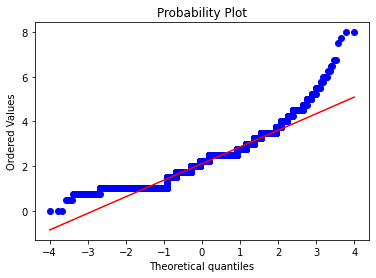

In [ ]:
stats.probplot(data['bathrooms'], dist="norm", plot=plt)
plt.show()

This data is moderately normally distributed and can be considered for further analysis.

**`sqft_living`** Column

> This variable tells us about the living area of the house.



The data seems distributed normally for the most part. We can consider this variable for further analysis.

In [ ]:
sum(data.sqft_living.isna())

0

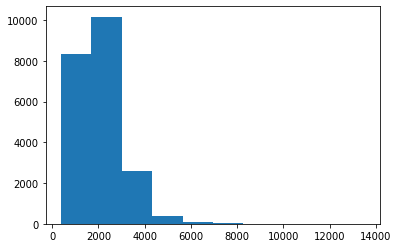

In [ ]:
plt.hist(data.sqft_living)
plt.show()

In [ ]:
data.sqft_living.skew(axis = 0, skipna = True)

1.4726288587172818

In [ ]:
#Checking skewness after performing log tranformation on this attribute

np.log(data.sqft_living).skew(axis = 0, skipna = True)

-0.02857690179142697

In [ ]:
data.sqft_living = np.log(data.sqft_living)

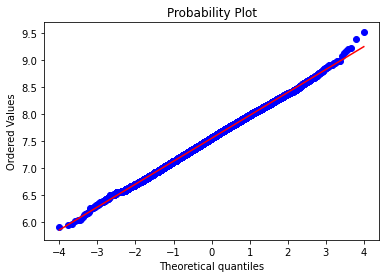

In [ ]:
stats.probplot(data['sqft_living'], dist="norm", plot=plt)
plt.show()

Data is **normally distributed** after taking log tranformation of the data.




**`sqft_lot`** Column



> This variable tells us about the area of the whole lot of the area in square feet.



In [ ]:
sum(data.sqft_lot.isna())

0

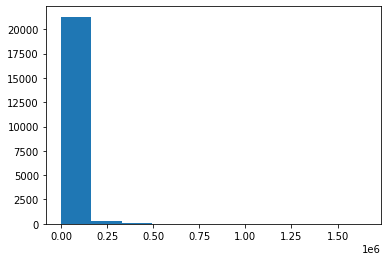

In [ ]:
plt.hist(data.sqft_lot)
plt.show()

In [ ]:
data.sqft_lot.skew(axis = 0, skipna = True)

13.072579299703827

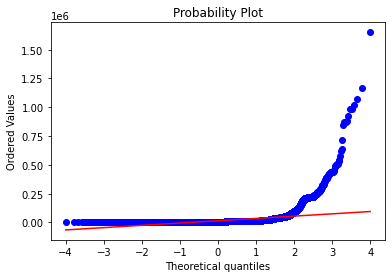

In [ ]:
stats.probplot(data['sqft_lot'], dist="norm", plot=plt)
plt.show()

In [ ]:
#Performing log tranformation

np.log(data.sqft_lot).skew(axis = 0, skipna = True)

data.sqft_lot = np.log(data.sqft_lot)

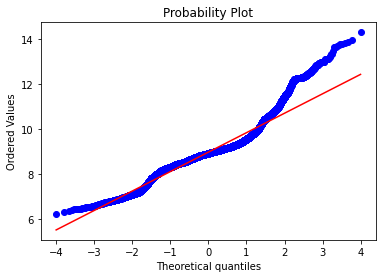

In [ ]:
stats.probplot(data['sqft_lot'], dist="norm", plot=plt)
plt.show()

After taking the log tranformation is data is distributed more normally now.

Data is **normally distributed**

**`floors`** Column

> This Columns tell us about the floors present in the house.

In [ ]:
sum(data.floors.isna())

0

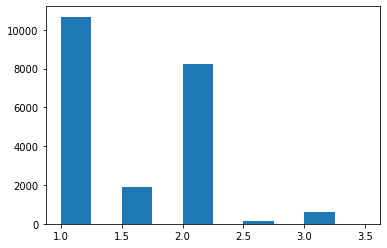

In [ ]:
plt.hist(data.floors)
plt.show()

In [ ]:
print(data.floors)

0        1.0
1        2.0
2        1.0
3        1.0
4        1.0
        ... 
21608    3.0
21609    2.0
21610    2.0
21611    2.0
21612    2.0
Name: floors, Length: 21599, dtype: float64


I am not tranforming this column's value as they are pretty straight forward for performing further analysis.

**waterfront** Column

> This column tell us about the number of waterfront views that can be seen from the house.

In [ ]:
sum(data.waterfront.isna())

0

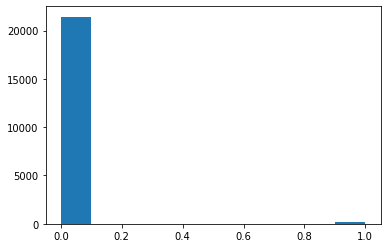

In [ ]:
plt.hist(data.waterfront)
plt.show()

In [ ]:
print(data.waterfront.unique())

[0 1]


> As there are 2 unique values in this column, we can tranform this attribute into **dummy variables**. But as there are 2 variables we dont have create one more column while creating dummy variable. This alone column is sufficient for dummy variables.

> As there are so many values in this columns are 0, as there are very less houses having waterfront, I think this column is safe to delete.




In [ ]:
data = data.drop(columns = ['waterfront'])

**view** Column



> This column tell us about the number of views that can be seen from this house.



In [ ]:
sum(data.view.isna())

0

In [ ]:
print(data.view.unique())

[0 3 4 2 1]



As there are 5 unique values in this column, we can create dummy variables for this column

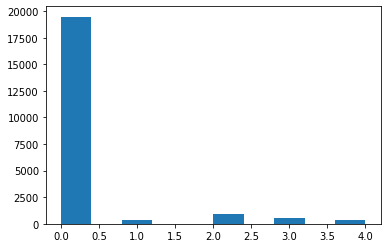

In [ ]:
plt.hist(data.view)
plt.show()

In [ ]:
#Creating dummy variables where each new atrribute will denote the number of views.
#There are total of 5 variable denoting house having 0 views, 1 view, 2 views, 3 views and 4 views.

data = pd.get_dummies(data, columns=['view'])
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,view_0,view_1,view_2,view_3,view_4
0,2014,12.309982,1.732051,1.00,7.073270,8.639411,1.0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1,0,0,0,0
1,2014,13.195614,1.732051,2.25,7.851661,8.887653,2.0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1,0,0,0,0
2,2015,12.100712,1.414214,1.00,6.646391,9.210340,1.0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1,0,0,0,0
3,2014,13.311329,2.000000,3.00,7.580700,8.517193,1.0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1,0,0,0,0
4,2015,13.142166,1.732051,2.00,7.426549,8.997147,1.0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014,12.793859,1.732051,2.50,7.333023,7.030857,3.0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,1,0,0,0,0
21609,2015,12.899220,2.000000,2.50,7.745003,8.667852,2.0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,1,0,0,0,0
21610,2014,12.904459,1.414214,0.75,6.927558,7.207860,2.0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,1,0,0,0,0
21611,2015,12.899220,1.732051,2.50,7.377759,7.778211,2.0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,1,0,0,0,0


**condition** Column

> This column tells us about the condition of the house. Higher the condition is better the house is.

In [ ]:
sum(data.condition.isna())

0

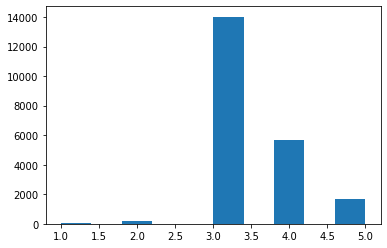

In [ ]:
plt.hist(data.condition)
plt.show()

In [ ]:
#Printing the unique values present in this attributes' values.

print(data.condition.unique())

[3 5 4 1 2]


In [ ]:
#Creating dummy variables of 'condition' attribute.
#Each dummy variable will denote the house are of which conditions.
#There are 5 dummy variables in total created here. They are condition_1, condition_2, condition_3, condition_4 and condition_5.

data = pd.get_dummies(data, columns=['condition'])
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5
0,2014,12.309982,1.732051,1.00,7.073270,8.639411,1.0,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1,0,0,0,0,0,0,1,0,0
1,2014,13.195614,1.732051,2.25,7.851661,8.887653,2.0,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1,0,0,0,0,0,0,1,0,0
2,2015,12.100712,1.414214,1.00,6.646391,9.210340,1.0,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1,0,0,0,0,0,0,1,0,0
3,2014,13.311329,2.000000,3.00,7.580700,8.517193,1.0,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1,0,0,0,0,0,0,0,0,1
4,2015,13.142166,1.732051,2.00,7.426549,8.997147,1.0,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014,12.793859,1.732051,2.50,7.333023,7.030857,3.0,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,1,0,0,0,0,0,0,1,0,0
21609,2015,12.899220,2.000000,2.50,7.745003,8.667852,2.0,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,1,0,0,0,0,0,0,1,0,0
21610,2014,12.904459,1.414214,0.75,6.927558,7.207860,2.0,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,1,0,0,0,0,0,0,1,0,0
21611,2015,12.899220,1.732051,2.50,7.377759,7.778211,2.0,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,1,0,0,0,0,0,0,1,0,0


**grade** Column

> This column tells us about the grade of the house. Higher the grade is better the house is.




In [ ]:
sum(data.grade.isna())

0

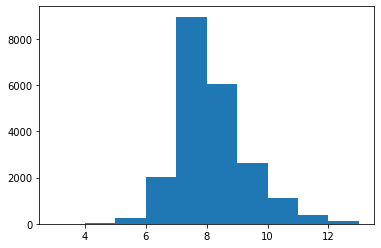

In [ ]:
plt.hist(data.grade)
plt.show()

In [ ]:
#Checking out the grade attribute by printing it.

print(data.grade)

0        7
1        7
2        6
3        7
4        8
        ..
21608    8
21609    8
21610    7
21611    8
21612    7
Name: grade, Length: 21599, dtype: int64


In [ ]:
data.grade.skew(axis = 0, skipna = True)

0.7818686241798748

In [ ]:
#Checking skew value after applying the log transformation
#As the output tells us that the skew value is less, hence we can apply log tranformation.

np.log(data.grade).skew(axis = 0, skipna = True)

0.19102433982816575

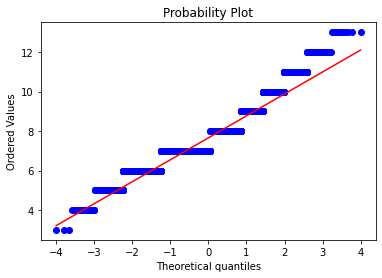

In [ ]:
stats.probplot(data['grade'], dist="norm", plot=plt)
plt.show()

In [ ]:
#applying log trandformation to grade attribute.

data.grade = np.log(data.grade)

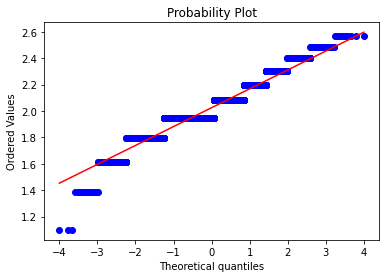

In [ ]:
stats.probplot(data['grade'], dist="norm", plot=plt)
plt.show()

By performing **log tranformation** the skewness of the grade variable has been reduced and the data is** normally distributed**.

**sqft_above** Column



> This column tell us about the area excluding the are of basement. It displays the total area of the house which is not on ground floor.



In [ ]:
sum(data.sqft_above.isna())

0

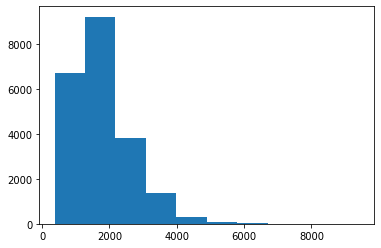

In [ ]:
plt.hist(data.sqft_above)
plt.show()

In [ ]:
data.sqft_above.skew(axis = 0, skipna = True)

1.4471362420780685

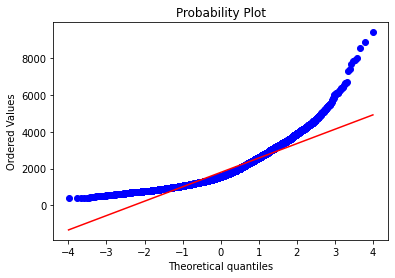

In [ ]:
stats.probplot(data['sqft_above'], dist="norm", plot=plt)
plt.show()

In [ ]:
#Applying the log tranformation to lower the skewness value and distribute the data normally.

np.log(data.sqft_above).skew(axis = 0, skipna = True)

0.25889998574257633

In [ ]:
data.sqft_above = np.log(data.sqft_above)

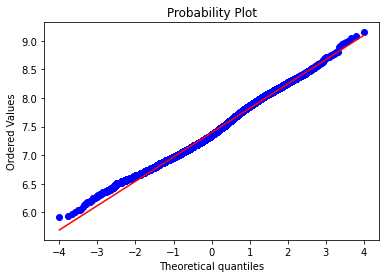

In [ ]:
stats.probplot(data['sqft_above'], dist="norm", plot=plt)
plt.show()

By performing log tranformation the data got** normally distributed**.

**sqft_basement** Column


> This column tells us the area of only basement.



In [ ]:
sum(data.sqft_basement.isna())

0

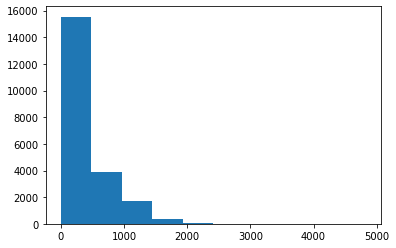

In [ ]:
plt.hist(data.sqft_basement)
plt.show()

In [ ]:
data.sqft_basement.skew(axis = 0, skipna = True)

1.5771789573025838

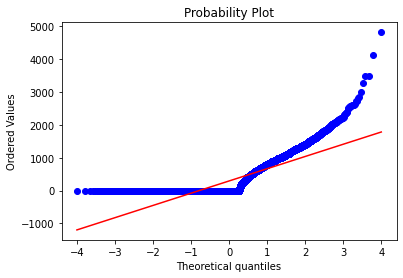

In [ ]:
stats.probplot(data['sqft_basement'], dist="norm", plot=plt)
plt.show()

In [ ]:
#Applying square root tranformation on 'sqft_basement' atrtribute.

np.sqrt(data.sqft_basement).skew(axis = 0, skipna = True)

0.7829814384343423

In [ ]:
data.sqft_basement = np.sqrt(data.sqft_basement)

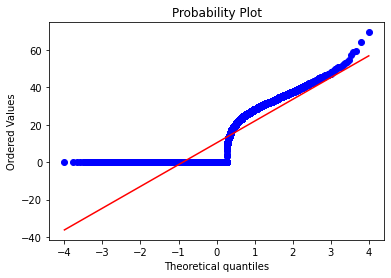

In [ ]:
stats.probplot(data['sqft_basement'], dist="norm", plot=plt)
plt.show()

From the above graph we can say that the data is **bimodal**. 

**yr_built** Column


> This column tells the year when the house was built



In [ ]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5
0,2014,12.309982,1.732051,1.00,7.073270,8.639411,1.0,1.945910,7.073270,0.000000,1955,0,98178,47.5112,-122.257,1340,5650,1,0,0,0,0,0,0,1,0,0
1,2014,13.195614,1.732051,2.25,7.851661,8.887653,2.0,1.945910,7.682482,20.000000,1951,1991,98125,47.7210,-122.319,1690,7639,1,0,0,0,0,0,0,1,0,0
2,2015,12.100712,1.414214,1.00,6.646391,9.210340,1.0,1.791759,6.646391,0.000000,1933,0,98028,47.7379,-122.233,2720,8062,1,0,0,0,0,0,0,1,0,0
3,2014,13.311329,2.000000,3.00,7.580700,8.517193,1.0,1.945910,6.956545,30.166206,1965,0,98136,47.5208,-122.393,1360,5000,1,0,0,0,0,0,0,0,0,1
4,2015,13.142166,1.732051,2.00,7.426549,8.997147,1.0,2.079442,7.426549,0.000000,1987,0,98074,47.6168,-122.045,1800,7503,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014,12.793859,1.732051,2.50,7.333023,7.030857,3.0,2.079442,7.333023,0.000000,2009,0,98103,47.6993,-122.346,1530,1509,1,0,0,0,0,0,0,1,0,0
21609,2015,12.899220,2.000000,2.50,7.745003,8.667852,2.0,2.079442,7.745003,0.000000,2014,0,98146,47.5107,-122.362,1830,7200,1,0,0,0,0,0,0,1,0,0
21610,2014,12.904459,1.414214,0.75,6.927558,7.207860,2.0,1.945910,6.927558,0.000000,2009,0,98144,47.5944,-122.299,1020,2007,1,0,0,0,0,0,0,1,0,0
21611,2015,12.899220,1.732051,2.50,7.377759,7.778211,2.0,2.079442,7.377759,0.000000,2004,0,98027,47.5345,-122.069,1410,1287,1,0,0,0,0,0,0,1,0,0


Below code cell creates a new variable named as 'age_of_house' which denotes the age of house since it renovation or the year it was built. First preference would be consider year of renovation over the year it was built because after renovation the age of house starts from 0.

In [ ]:
sum(data.yr_built.isna())

0

In [ ]:
sum(data.yr_renovated.isna())

0

In [ ]:
if [data['yr_renovated'] != 0]:
  data['age_of_house'] = data['date'] - data['yr_renovated']

if [data['yr_renovated'] == 0]:
  data['age_of_house'] = data['date'] - data['yr_built']

In [ ]:
data['age_of_house']

0        59
1        63
2        82
3        49
4        28
         ..
21608     5
21609     1
21610     5
21611    11
21612     6
Name: age_of_house, Length: 21599, dtype: int64

**zipcode** Column

> As zipcode is unique to every area



In [ ]:
data.corr()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5,age_of_house
date,1.000000,0.004798,-0.008912,-0.026585,-0.029433,-0.006647,-0.022382,-0.031811,-0.024633,-0.012250,0.003584,-0.023725,0.001269,-0.029125,0.000252,-0.021597,0.000208,-0.004205,0.004645,0.007020,-0.003729,-0.001666,0.004417,0.016502,0.029154,-0.006943,-0.046351,0.012335
price,0.004798,1.000000,0.350538,0.551350,0.674813,0.137840,0.310741,0.693656,0.586116,0.279197,0.080655,0.114485,-0.038607,0.449052,0.050391,0.619368,0.092059,-0.330750,0.097913,0.159644,0.172818,0.225850,-0.037271,-0.086314,0.021924,-0.040667,0.061100,-0.080573
bedrooms,-0.008912,0.350538,1.000000,0.531646,0.649482,0.194594,0.189619,0.388889,0.544360,0.253959,0.179487,0.015225,-0.170692,-0.019433,0.147319,0.410372,0.033197,-0.079282,0.021531,0.045705,0.051125,0.031194,-0.038176,-0.056664,0.008674,-0.008863,0.022957,-0.179616
bathrooms,-0.026585,0.551350,0.531646,1.000000,0.762359,0.100004,0.502631,0.665414,0.696068,0.239234,0.507098,0.050593,-0.204392,0.024507,0.223738,0.569923,0.088031,-0.177986,0.037978,0.088424,0.112292,0.107955,-0.042896,-0.077078,0.190903,-0.166731,-0.034569,-0.507486
sqft_living,-0.029433,0.674813,0.649482,0.762359,1.000000,0.325287,0.367693,0.744241,0.865079,0.359958,0.349713,0.051039,-0.221767,0.039019,0.256091,0.737194,0.162611,-0.239730,0.063762,0.124028,0.141889,0.135899,-0.044161,-0.081635,0.098691,-0.077119,-0.015965,-0.350157
sqft_lot,-0.006647,0.137840,0.194594,0.100004,0.325287,1.000000,-0.237611,0.162738,0.318084,0.037036,-0.007397,0.023602,-0.281782,-0.149296,0.376452,0.363325,0.623659,-0.112528,0.018543,0.054224,0.073388,0.073689,0.015146,0.039579,-0.120108,0.122735,-0.002860,0.007291
floors,-0.022382,0.310741,0.189619,0.502631,0.367693,-0.237611,1.000000,0.463163,0.547664,-0.268568,0.489204,0.006445,-0.059426,0.049345,0.125539,0.280163,-0.010806,-0.017042,-0.022681,0.008412,0.020360,0.025175,-0.023025,-0.055645,0.317722,-0.257689,-0.120391,-0.489527
grade,-0.031811,0.693656,0.388889,0.665414,0.744241,0.162738,0.463163,1.000000,0.738344,0.122588,0.462547,0.014124,-0.185977,0.116154,0.194168,0.694690,0.110067,-0.225127,0.047433,0.117610,0.135717,0.135261,-0.061628,-0.096703,0.198731,-0.138866,-0.084989,-0.463021
sqft_above,-0.024633,0.586116,0.544360,0.696068,0.865079,0.318084,0.547664,0.738344,1.000000,-0.132226,0.451386,0.026361,-0.290011,-0.018899,0.361004,0.715010,0.176532,-0.146533,0.023194,0.073877,0.092432,0.095288,-0.034806,-0.070387,0.189476,-0.134555,-0.087943,-0.451746
sqft_basement,-0.012250,0.279197,0.253959,0.239234,0.359958,0.037036,-0.268568,0.122588,-0.132226,1.000000,-0.158744,0.065150,0.117581,0.126805,-0.192702,0.135589,-0.009737,-0.247170,0.097444,0.129621,0.135919,0.117863,-0.020354,-0.021568,-0.148435,0.091463,0.123415,0.158538


In [ ]:
print(np.sort(data.zipcode.unique()))

[98001 98002 98003 98004 98005 98006 98007 98008 98010 98011 98014 98019
 98022 98023 98024 98027 98028 98029 98030 98031 98032 98033 98034 98038
 98039 98040 98042 98045 98052 98053 98055 98056 98058 98059 98065 98070
 98072 98074 98075 98077 98092 98102 98103 98105 98106 98107 98108 98109
 98112 98115 98116 98117 98118 98119 98122 98125 98126 98133 98136 98144
 98146 98148 98155 98166 98168 98177 98178 98188 98198 98199]


**lat** and **long** Columns

> As these 2 coordinates denotes the exact position which zipcodes does the same task. Therefore, this variable can be safely removed.



In [ ]:
data = data.drop(columns=['lat','long'])
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5,age_of_house
0,2014,12.309982,1.732051,1.00,7.073270,8.639411,1.0,1.945910,7.073270,0.000000,1955,0,98178,1340,5650,1,0,0,0,0,0,0,1,0,0,59
1,2014,13.195614,1.732051,2.25,7.851661,8.887653,2.0,1.945910,7.682482,20.000000,1951,1991,98125,1690,7639,1,0,0,0,0,0,0,1,0,0,63
2,2015,12.100712,1.414214,1.00,6.646391,9.210340,1.0,1.791759,6.646391,0.000000,1933,0,98028,2720,8062,1,0,0,0,0,0,0,1,0,0,82
3,2014,13.311329,2.000000,3.00,7.580700,8.517193,1.0,1.945910,6.956545,30.166206,1965,0,98136,1360,5000,1,0,0,0,0,0,0,0,0,1,49
4,2015,13.142166,1.732051,2.00,7.426549,8.997147,1.0,2.079442,7.426549,0.000000,1987,0,98074,1800,7503,1,0,0,0,0,0,0,1,0,0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014,12.793859,1.732051,2.50,7.333023,7.030857,3.0,2.079442,7.333023,0.000000,2009,0,98103,1530,1509,1,0,0,0,0,0,0,1,0,0,5
21609,2015,12.899220,2.000000,2.50,7.745003,8.667852,2.0,2.079442,7.745003,0.000000,2014,0,98146,1830,7200,1,0,0,0,0,0,0,1,0,0,1
21610,2014,12.904459,1.414214,0.75,6.927558,7.207860,2.0,1.945910,6.927558,0.000000,2009,0,98144,1020,2007,1,0,0,0,0,0,0,1,0,0,5
21611,2015,12.899220,1.732051,2.50,7.377759,7.778211,2.0,2.079442,7.377759,0.000000,2004,0,98027,1410,1287,1,0,0,0,0,0,0,1,0,0,11


In [ ]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15', 'view_0',
       'view_1', 'view_2', 'view_3', 'view_4', 'condition_1', 'condition_2',
       'condition_3', 'condition_4', 'condition_5', 'age_of_house'],
      dtype='object')

**sqft_living15** Column

> This variable tells us the average of the living area of 15 houses nearby to that house.



In [ ]:
sum(data.sqft_living15.isna())

0

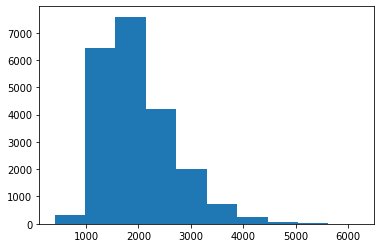

In [ ]:
plt.hist(data.sqft_living15)
plt.show()

In [ ]:
data.sqft_living15.skew(axis = 0, skipna = True)

1.1068182225923429

In [ ]:
np.log(data.sqft_living15).skew(axis = 0, skipna = True)

0.20584704026125922

In [ ]:
#Applying log transformation

data.sqft_living15 = np.log(data.sqft_living15)

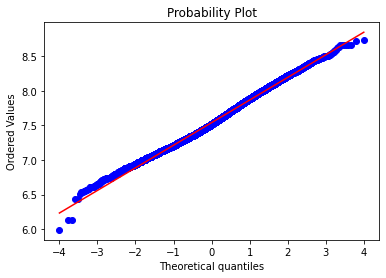

In [ ]:
stats.probplot(data['sqft_living15'], dist="norm", plot=plt)
plt.show()

After performing log tranformation the data is **normally distributed**

**sqft_lot15** Column

> This variable tells us the average of the lot area of 15 houses nearby to that house.



In [ ]:
sum(data.sqft_lot15.isna())

0

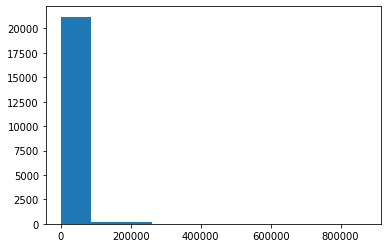

In [ ]:
plt.hist(data.sqft_lot15)
plt.show()

As there are so many observations having same value in this atttribute, I think it is safe to leave because it wont have much impact on the final variable.

In [ ]:
data = data.drop(columns='sqft_lot15')
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5,age_of_house
0,2014,12.309982,1.732051,1.00,7.073270,8.639411,1.0,1.945910,7.073270,0.000000,1955,0,98178,7.200425,1,0,0,0,0,0,0,1,0,0,59
1,2014,13.195614,1.732051,2.25,7.851661,8.887653,2.0,1.945910,7.682482,20.000000,1951,1991,98125,7.432484,1,0,0,0,0,0,0,1,0,0,63
2,2015,12.100712,1.414214,1.00,6.646391,9.210340,1.0,1.791759,6.646391,0.000000,1933,0,98028,7.908387,1,0,0,0,0,0,0,1,0,0,82
3,2014,13.311329,2.000000,3.00,7.580700,8.517193,1.0,1.945910,6.956545,30.166206,1965,0,98136,7.215240,1,0,0,0,0,0,0,0,0,1,49
4,2015,13.142166,1.732051,2.00,7.426549,8.997147,1.0,2.079442,7.426549,0.000000,1987,0,98074,7.495542,1,0,0,0,0,0,0,1,0,0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014,12.793859,1.732051,2.50,7.333023,7.030857,3.0,2.079442,7.333023,0.000000,2009,0,98103,7.333023,1,0,0,0,0,0,0,1,0,0,5
21609,2015,12.899220,2.000000,2.50,7.745003,8.667852,2.0,2.079442,7.745003,0.000000,2014,0,98146,7.512071,1,0,0,0,0,0,0,1,0,0,1
21610,2014,12.904459,1.414214,0.75,6.927558,7.207860,2.0,1.945910,6.927558,0.000000,2009,0,98144,6.927558,1,0,0,0,0,0,0,1,0,0,5
21611,2015,12.899220,1.732051,2.50,7.377759,7.778211,2.0,2.079442,7.377759,0.000000,2004,0,98027,7.251345,1,0,0,0,0,0,0,1,0,0,11


In [ ]:
#Saving the newly created data after preprocessing into new csv file named as 'KC_cleaned.csv'

pd.DataFrame(data).to_csv("KC_cleaned.csv", index = False)

**R Studio**

> After doing some more in-depth analysis in R-Studio, now we can delete 4 columns from the dataframe. The 4 columns are view_4, condition_5, age_of_house and sqft_living.

> Detailed explaination is given in the .R file. If you haven't checked the R file link is below.


> Link:





> After getting the final model some important number are:


*   Multiple R-Square = 0.6584
*   Residual error = 0.3
*   p-value of overall model = < 2.2e-16
*   Dimension of the dataset = 21613 x 21

In [ ]:
data = data.drop(columns=['view_4', 'condition_5', 'age_of_house', 'sqft_living'])
data

,date,price,bedrooms,bathrooms,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,view_0,view_1,view_2,view_3,condition_1,condition_2,condition_3,condition_4
0,2014,12.309982,1.732051,1.00,8.639411,1.0,1.945910,7.073270,0.000000,1955,0,98178,7.200425,1,0,0,0,0,0,1,0
1,2014,13.195614,1.732051,2.25,8.887653,2.0,1.945910,7.682482,20.000000,1951,1991,98125,7.432484,1,0,0,0,0,0,1,0
2,2015,12.100712,1.414214,1.00,9.210340,1.0,1.791759,6.646391,0.000000,1933,0,98028,7.908387,1,0,0,0,0,0,1,0
3,2014,13.311329,2.000000,3.00,8.517193,1.0,1.945910,6.956545,30.166206,1965,0,98136,7.215240,1,0,0,0,0,0,0,0
4,2015,13.142166,1.732051,2.00,8.997147,1.0,2.079442,7.426549,0.000000,1987,0,98074,7.495542,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014,12.793859,1.732051,2.50,7.030857,3.0,2.079442,7.333023,0.000000,2009,0,98103,7.333023,1,0,0,0,0,0,1,0
21609,2015,12.899220,2.000000,2.50,8.667852,2.0,2.079442,7.745003,0.000000,2014,0,98146,7.512071,1,0,0,0,0,0,1,0
21610,2014,12.904459,1.414214,0.75,7.207860,2.0,1.945910,6.927558,0.000000,2009,0,98144,6.927558,1,0,0,0,0,0,1,0
21611,2015,12.899220,1.732051,2.50,7.778211,2.0,2.079442,7.377759,0.000000,2004,0,98027,7.251345,1,0,0,0,0,0,1,0


Regression

In [ ]:
#printing the shape of the data.
data.shape

(21599, 21)

In [ ]:
#Importing libraries regarding the regression techniques.
#Importing library for splitting the data into testing and training datasets.

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split

In [ ]:
#Separating the 'price' variable from the rest of the dataset and naming it as target as it is the target variable. 
target = data.price

In [ ]:
#Dropping the target variable from the dataset.
data = data.drop(['price'], axis = 1)
data

,date,bedrooms,bathrooms,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,view_0,view_1,view_2,view_3,condition_1,condition_2,condition_3,condition_4
0,2014,1.732051,1.00,8.639411,1.0,1.945910,7.073270,0.000000,1955,0,98178,7.200425,1,0,0,0,0,0,1,0
1,2014,1.732051,2.25,8.887653,2.0,1.945910,7.682482,20.000000,1951,1991,98125,7.432484,1,0,0,0,0,0,1,0
2,2015,1.414214,1.00,9.210340,1.0,1.791759,6.646391,0.000000,1933,0,98028,7.908387,1,0,0,0,0,0,1,0
3,2014,2.000000,3.00,8.517193,1.0,1.945910,6.956545,30.166206,1965,0,98136,7.215240,1,0,0,0,0,0,0,0
4,2015,1.732051,2.00,8.997147,1.0,2.079442,7.426549,0.000000,1987,0,98074,7.495542,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014,1.732051,2.50,7.030857,3.0,2.079442,7.333023,0.000000,2009,0,98103,7.333023,1,0,0,0,0,0,1,0
21609,2015,2.000000,2.50,8.667852,2.0,2.079442,7.745003,0.000000,2014,0,98146,7.512071,1,0,0,0,0,0,1,0
21610,2014,1.414214,0.75,7.207860,2.0,1.945910,6.927558,0.000000,2009,0,98144,6.927558,1,0,0,0,0,0,1,0
21611,2015,1.732051,2.50,7.778211,2.0,2.079442,7.377759,0.000000,2004,0,98027,7.251345,1,0,0,0,0,0,1,0


In [ ]:
#Splitting the dataset and the target variable into training and testing datasets.
#These 4 datasets are names as vs_train, vs_train_target for training datasets, and vs_test, vs_target_test for testing datasets.

vs_train, vs_test, vs_target_train, vs_target_test = train_test_split(data, target, test_size=0.2, random_state=33)

#Converting the 2 lists into numpy arrays for easier use of functions from the libraries.

x = np.array(vs_train)
y = np.array(vs_target_train)

In [ ]:
#Creating linear regression object for further use.
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(x,y)

#Predicting the values by using linear regression.
p = linreg.predict(x)

# Now we can constuct a vector of errors
err = abs(p-y)

# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)

# Compute RMSE
rmse_train = np.sqrt(total_error/len(p))
print("RMSE value after using Linear Regression is", round(rmse_train,2))

RMSE value after using Linear Regression is 0.31


In [ ]:
from sklearn.model_selection import KFold

# Now let's compute RMSE using 10-fold x-validation
n = 10
#kf = KFold(len(x),n_splits=n)

kf = KFold(n_splits=n)
kf.get_n_splits(x)

#print(kf)  
#KFold(n_splits=n,random_state=None, shuffle=False)
 

xval_err = 0
#or train,test in kf:
for train, test in kf.split(x):
    linreg.fit(x[train],y[train])
    p = linreg.predict(x[test])
    e = p-y[test]
    xval_err += np.sqrt(np.dot(e,e)/len(x[test]))
       
rmse_10cv = xval_err/n

In [ ]:
#displaying RMSE on training and RMSE of 10-fold cross validation for 4 regression techniques.
#The four regression techniques are: Linear, Lasso, Ridge and Elastic-net.

a = 0.3
for name,met in [
        ('linear regression', LinearRegression()),
        ('lasso', Lasso(fit_intercept=True, alpha=a)),
        ('ridge', Ridge(fit_intercept=True, alpha=a)),
        ('elastic-net', ElasticNet(fit_intercept=True, alpha=a))
        ]:
    met.fit(x,y)
    p = met.predict(x)
    e = p-y
    total_error = np.dot(e,e)
    rmse_train = np.sqrt(total_error/len(p))

    #kf = KFold(len(x), n_folds=10)
    kf = KFold(n_splits=10)
    kf.get_n_splits(x)

    KFold(n_splits=n,random_state=None, shuffle=False)
    err = 0
    for train,test in kf.split(x):
        met.fit(x[train],y[train])
        p = met.predict(x[test])
        e = p-y[test]
        err += np.dot(e,e)
    rmse_10cv = np.sqrt(err/len(x))
    
    print('Method: %s' %name)
    print('RMSE on training: %.4f' %rmse_train)
    print('RMSE on 10-fold CV: %.4f' %rmse_10cv)
    print ("\n")

Method: linear regression
RMSE on training: 0.3073
RMSE on 10-fold CV: 0.3077


Method: lasso
RMSE on training: 0.4969
RMSE on 10-fold CV: 0.4971


Method: ridge
RMSE on training: 0.3073
RMSE on 10-fold CV: 0.3077


Method: elastic-net
RMSE on training: 0.4883
RMSE on 10-fold CV: 0.4885




> From the above results we can see **linear regression** and **ridge regression** has the **least values of RMSE** for both training and 10-fold CV(Cross Validation) validation methods.

> As this data doesn't suffer from any multicollinearity between the variables, I think **applying linear regression is the optimal method** to use. 





In [ ]:
#Printing the variable name and their regression coeeficients after applying the linear regression.

features = list(data.columns)

for i in range(len(features)):
    print("Feature: %s, Regression Coefficient is: %s" % (features[i], linreg.coef_[i]))

Feature: date, Regression Coefficient is: 0.043266474929046055
Feature: bedrooms, Regression Coefficient is: -0.17589597728224746
Feature: bathrooms, Regression Coefficient is: 0.07464126073510537
Feature: sqft_lot, Regression Coefficient is: -0.03820381860944972
Feature: floors, Regression Coefficient is: 0.07508121300154248
Feature: grade, Regression Coefficient is: 1.5615860053536639
Feature: sqft_above, Regression Coefficient is: 0.29978455333785087
Feature: sqft_basement, Regression Coefficient is: 0.0064780068971994325
Feature: yr_built, Regression Coefficient is: -0.005530212450814661
Feature: yr_renovated, Regression Coefficient is: 1.4294982512267629e-05
Feature: zipcode, Regression Coefficient is: 0.0002903055813890709
Feature: sqft_living15, Regression Coefficient is: 0.28793765801413335
Feature: view_0, Regression Coefficient is: -0.3430456782506732
Feature: view_1, Regression Coefficient is: -0.21633811150078985
Feature: view_2, Regression Coefficient is: -0.27232250661039

In [ ]:
#Printing variable names according to their coefficient values sorted in descending order.
#Here I have created dictionary where feature names are the keys and their regression coefficient as the values of those keys.
#Then sorted in descending order and then they are printed.

keys_list = features
values_list = linreg.coef_
zip_iterator = zip(keys_list, values_list)
a_dictionary = dict(zip_iterator)



sorted_values = sorted(a_dictionary.values(), reverse=True)
sorted_dict = {}

for i in sorted_values:
  for k in a_dictionary.keys():
    if a_dictionary[k] == i:
      sorted_dict[k] = a_dictionary[k]
      break;

print("Attributes", ':', "Linear_Coefficients")


for key, value in sorted_dict.items():
  print(key, ':', round(value,2))

Attributes : Linear_Coefficients
grade : 1.58
sqft_above : 0.3
sqft_living15 : 0.28
bathrooms : 0.07
floors : 0.07
date : 0.04
sqft_basement : 0.01
zipcode : 0.0
yr_renovated : 0.0
yr_built : -0.01
sqft_lot : -0.04
condition_4 : -0.06
condition_3 : -0.08
bedrooms : -0.17
condition_2 : -0.21
view_1 : -0.21
condition_1 : -0.22
view_3 : -0.25
view_2 : -0.28
view_0 : -0.36


In [ ]:
#While preprocessing of the price data, log transformation was applied on price target variable.
#To display the actual values I had taken anti-log to show the actual price predicted.
a = np.exp(linreg.predict(x[:10]))

#Displaying their actual value which is present in the dataset.
b = np.exp(y[:10])

print("Actual Values" + "\t\t\t" + "Predicted Values")

for i in range(len(a)):
  print(round(a[i],2),"\t\t\t",round(b[i],2))

Actual Values			Predicted Values
679044.01 			 615000.0
665479.3 			 675000.0
864007.34 			 514500.0
325550.02 			 429000.0
565431.4 			 537100.0
305720.49 			 240000.0
357099.84 			 300000.0
246907.52 			 212000.0
751731.63 			 619500.0
321259.68 			 160000.0
